
# Data loading from CSV file



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("/content/data.csv")

In [2]:
print("#=======================================================================#")
print("#======================== Basic Data Inspection ========================#")
print("#=======================================================================#")

print("The data table is in shape:" + str(train_data.shape))
print("**********************************************************************")
train_data.head()   #printing a sample of the data

#=======================================================================#
#======================== Basic Data Inspection ========================#
#=======================================================================#
The data table is in shape:(918, 12)
**********************************************************************


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(train_data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [4]:
print(train_data.dtypes.isnull())

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool


In [5]:
train_data.describe(include = "object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
train_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
duplicate_rows_df = train_data[train_data.duplicated()]       # Finding duplicated row in the data
print("number of duplicate rows: ", duplicate_rows_df.shape)
print(train_data.count())

number of duplicate rows:  (0, 12)
Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64


In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_encode = train_data.select_dtypes(include=['object']).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_encode:
    # Print the original unique values before encoding
    original_values = np.sort(train_data[column].astype(str).unique())
    print(f"Original unique values in {column}: {original_values}")

    # Convert the column to string type and fit transform with LabelEncoder
    train_data[column] = label_encoder.fit_transform(train_data[column].astype(str))

    # Print the sorted unique values in the encoded column (optional)
    encoded_values = np.sort(train_data[column].unique())
    print(f"Unique values in {column} Encoded: {encoded_values}")



Original unique values in Sex: ['F' 'M']
Unique values in Sex Encoded: [0 1]
Original unique values in ChestPainType: ['ASY' 'ATA' 'NAP' 'TA']
Unique values in ChestPainType Encoded: [0 1 2 3]
Original unique values in RestingECG: ['LVH' 'Normal' 'ST']
Unique values in RestingECG Encoded: [0 1 2]
Original unique values in ExerciseAngina: ['N' 'Y']
Unique values in ExerciseAngina Encoded: [0 1]
Original unique values in ST_Slope: ['Down' 'Flat' 'Up']
Unique values in ST_Slope Encoded: [0 1 2]


In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_encode = train_data.select_dtypes(include=['object']).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_encode:
    # Convert the column to string type and fit transform with LabelEncoder
    train_data[column] = label_encoder.fit_transform(train_data[column].astype(str))

    # Print the sorted unique values in the encoded column (optional)
    print(f"Unique values in {column} Encoded: {np.sort(train_data[column].unique())}")

# Display the first few rows of the DataFrame to check the new columns
train_data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


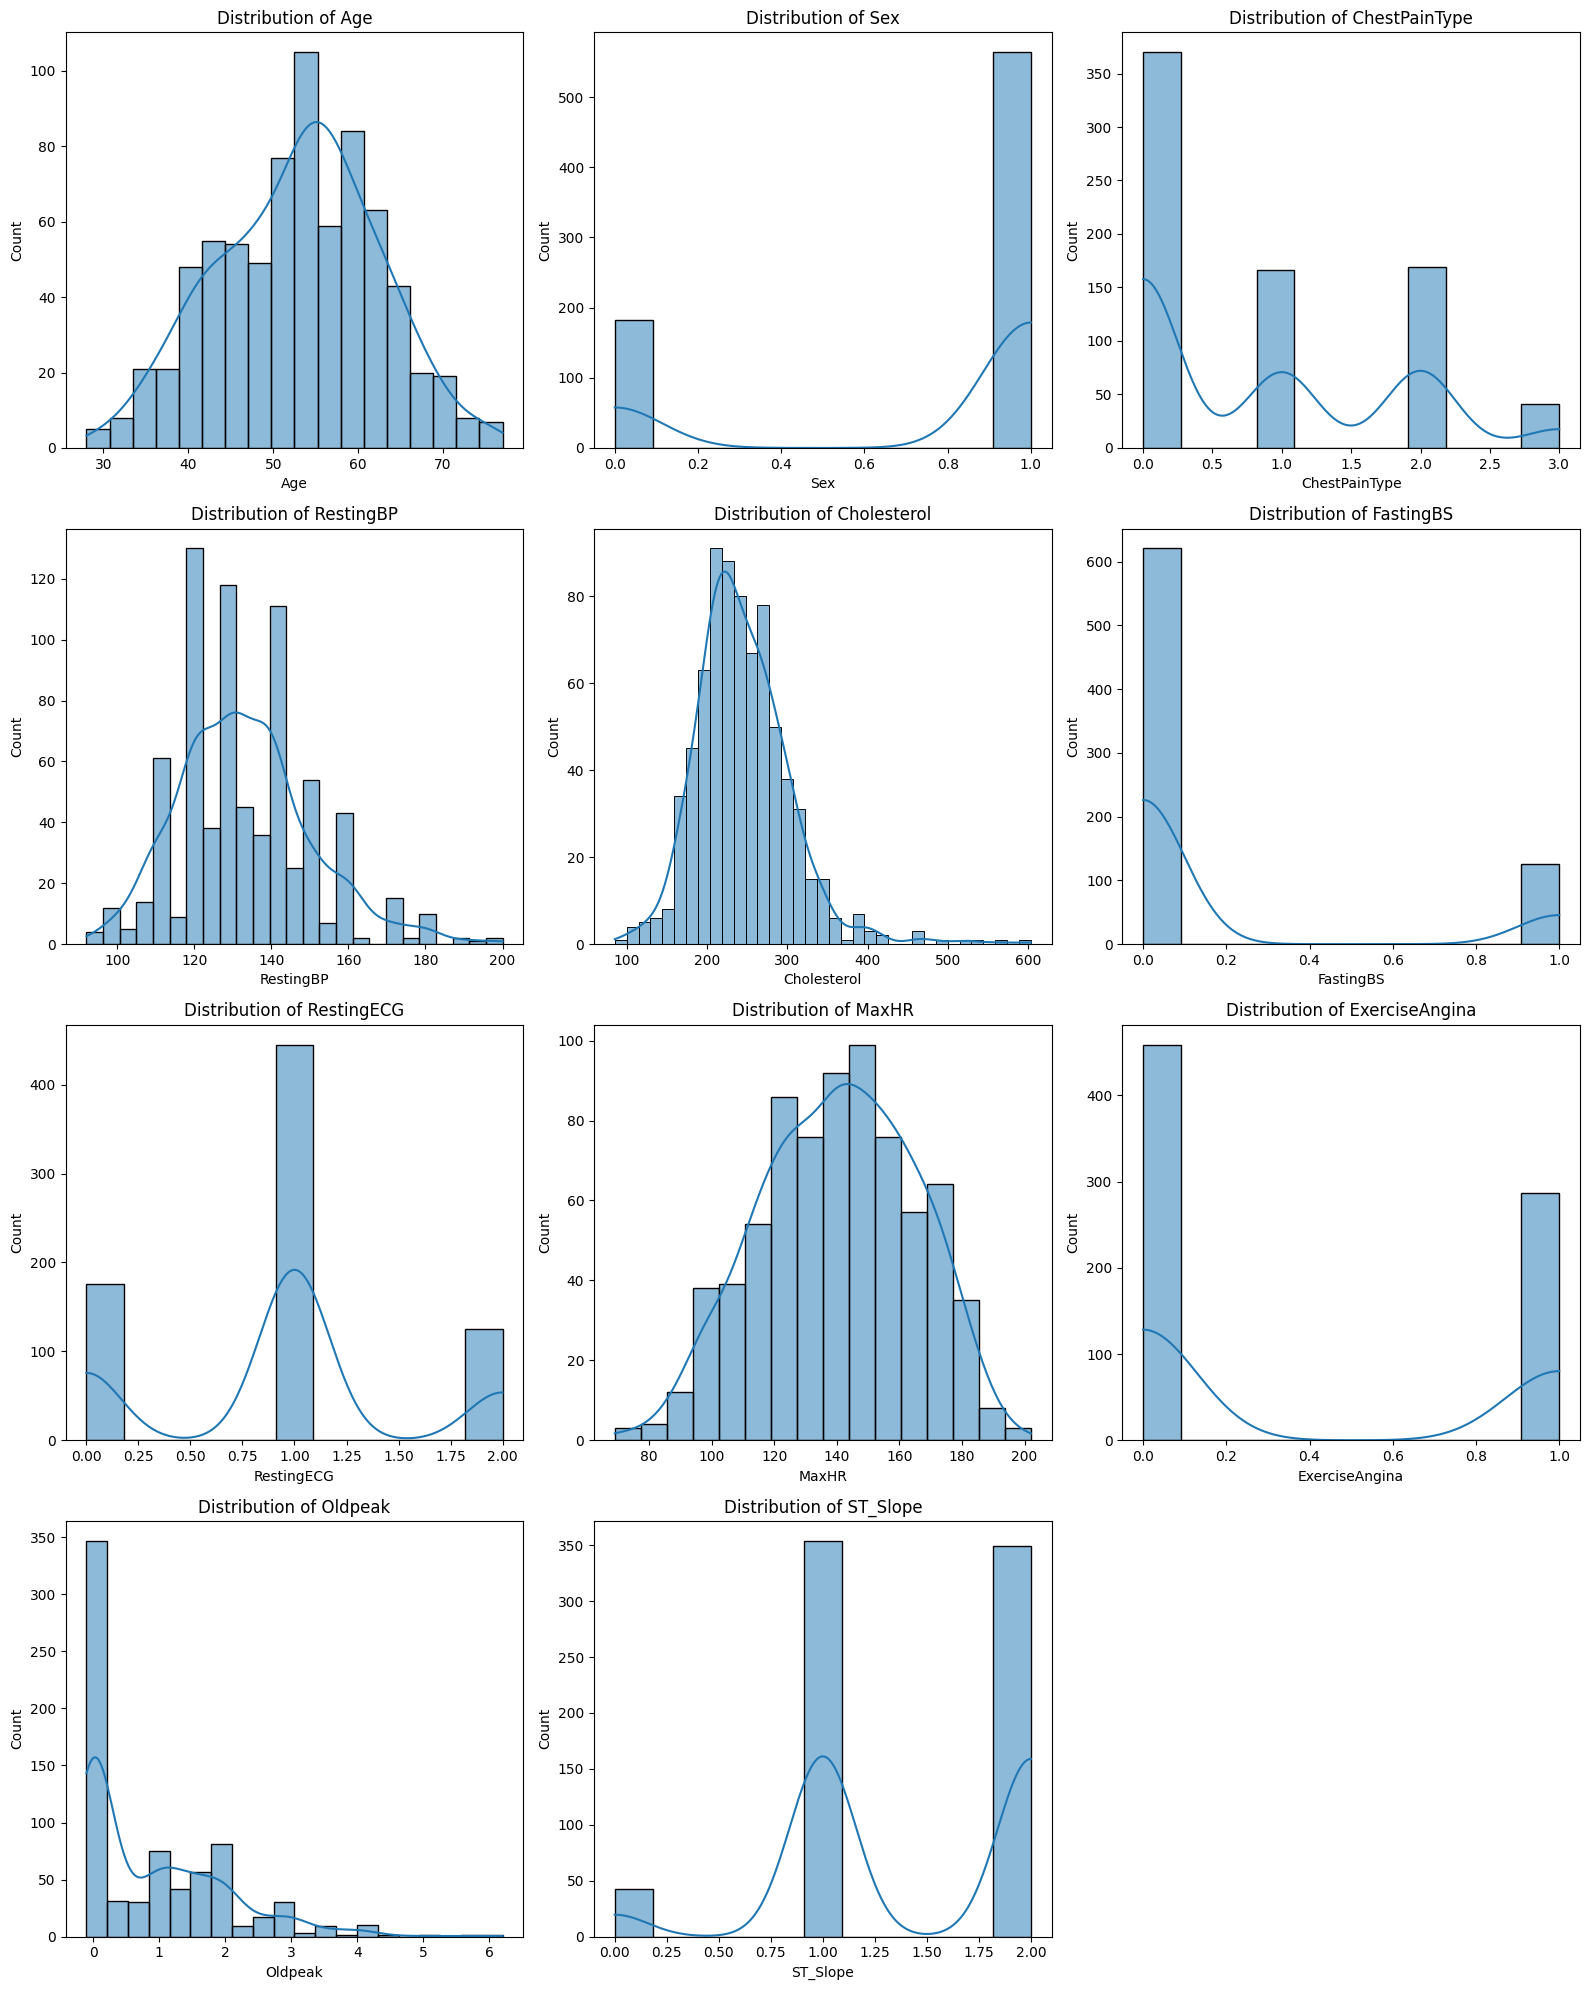

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(data):
  # Assuming 'data' is your DataFrame
  columns = train_data.columns  # Get all column names

  # Define the number of rows and columns for the grid
  num_cols = len(columns)
  n_cols = 3  # Number of plots per row
  n_rows = (num_cols // n_cols) + (num_cols % n_cols > 0)

  # Create the figure
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
  axes = axes.flatten()  # Flatten axes array to iterate easily

  # Plot each column
  for i, column in enumerate(columns):
      if train_data[column].dtype in ['int64', 'float64']:  # Only plot numerical columns
          sns.histplot(train_data[column], kde=True, ax=axes[i])
          axes[i].set_title(f'Distribution of {column}')
      else:
          axes[i].set_visible(False)  # Hide unused axes

  # Remove extra subplots
  for i in range(len(columns), len(axes)):
      axes[i].set_visible(False)

  plt.tight_layout()
  plt.show()

# Call the function to plot the distribution
plot_categorical_distribution(train_data)

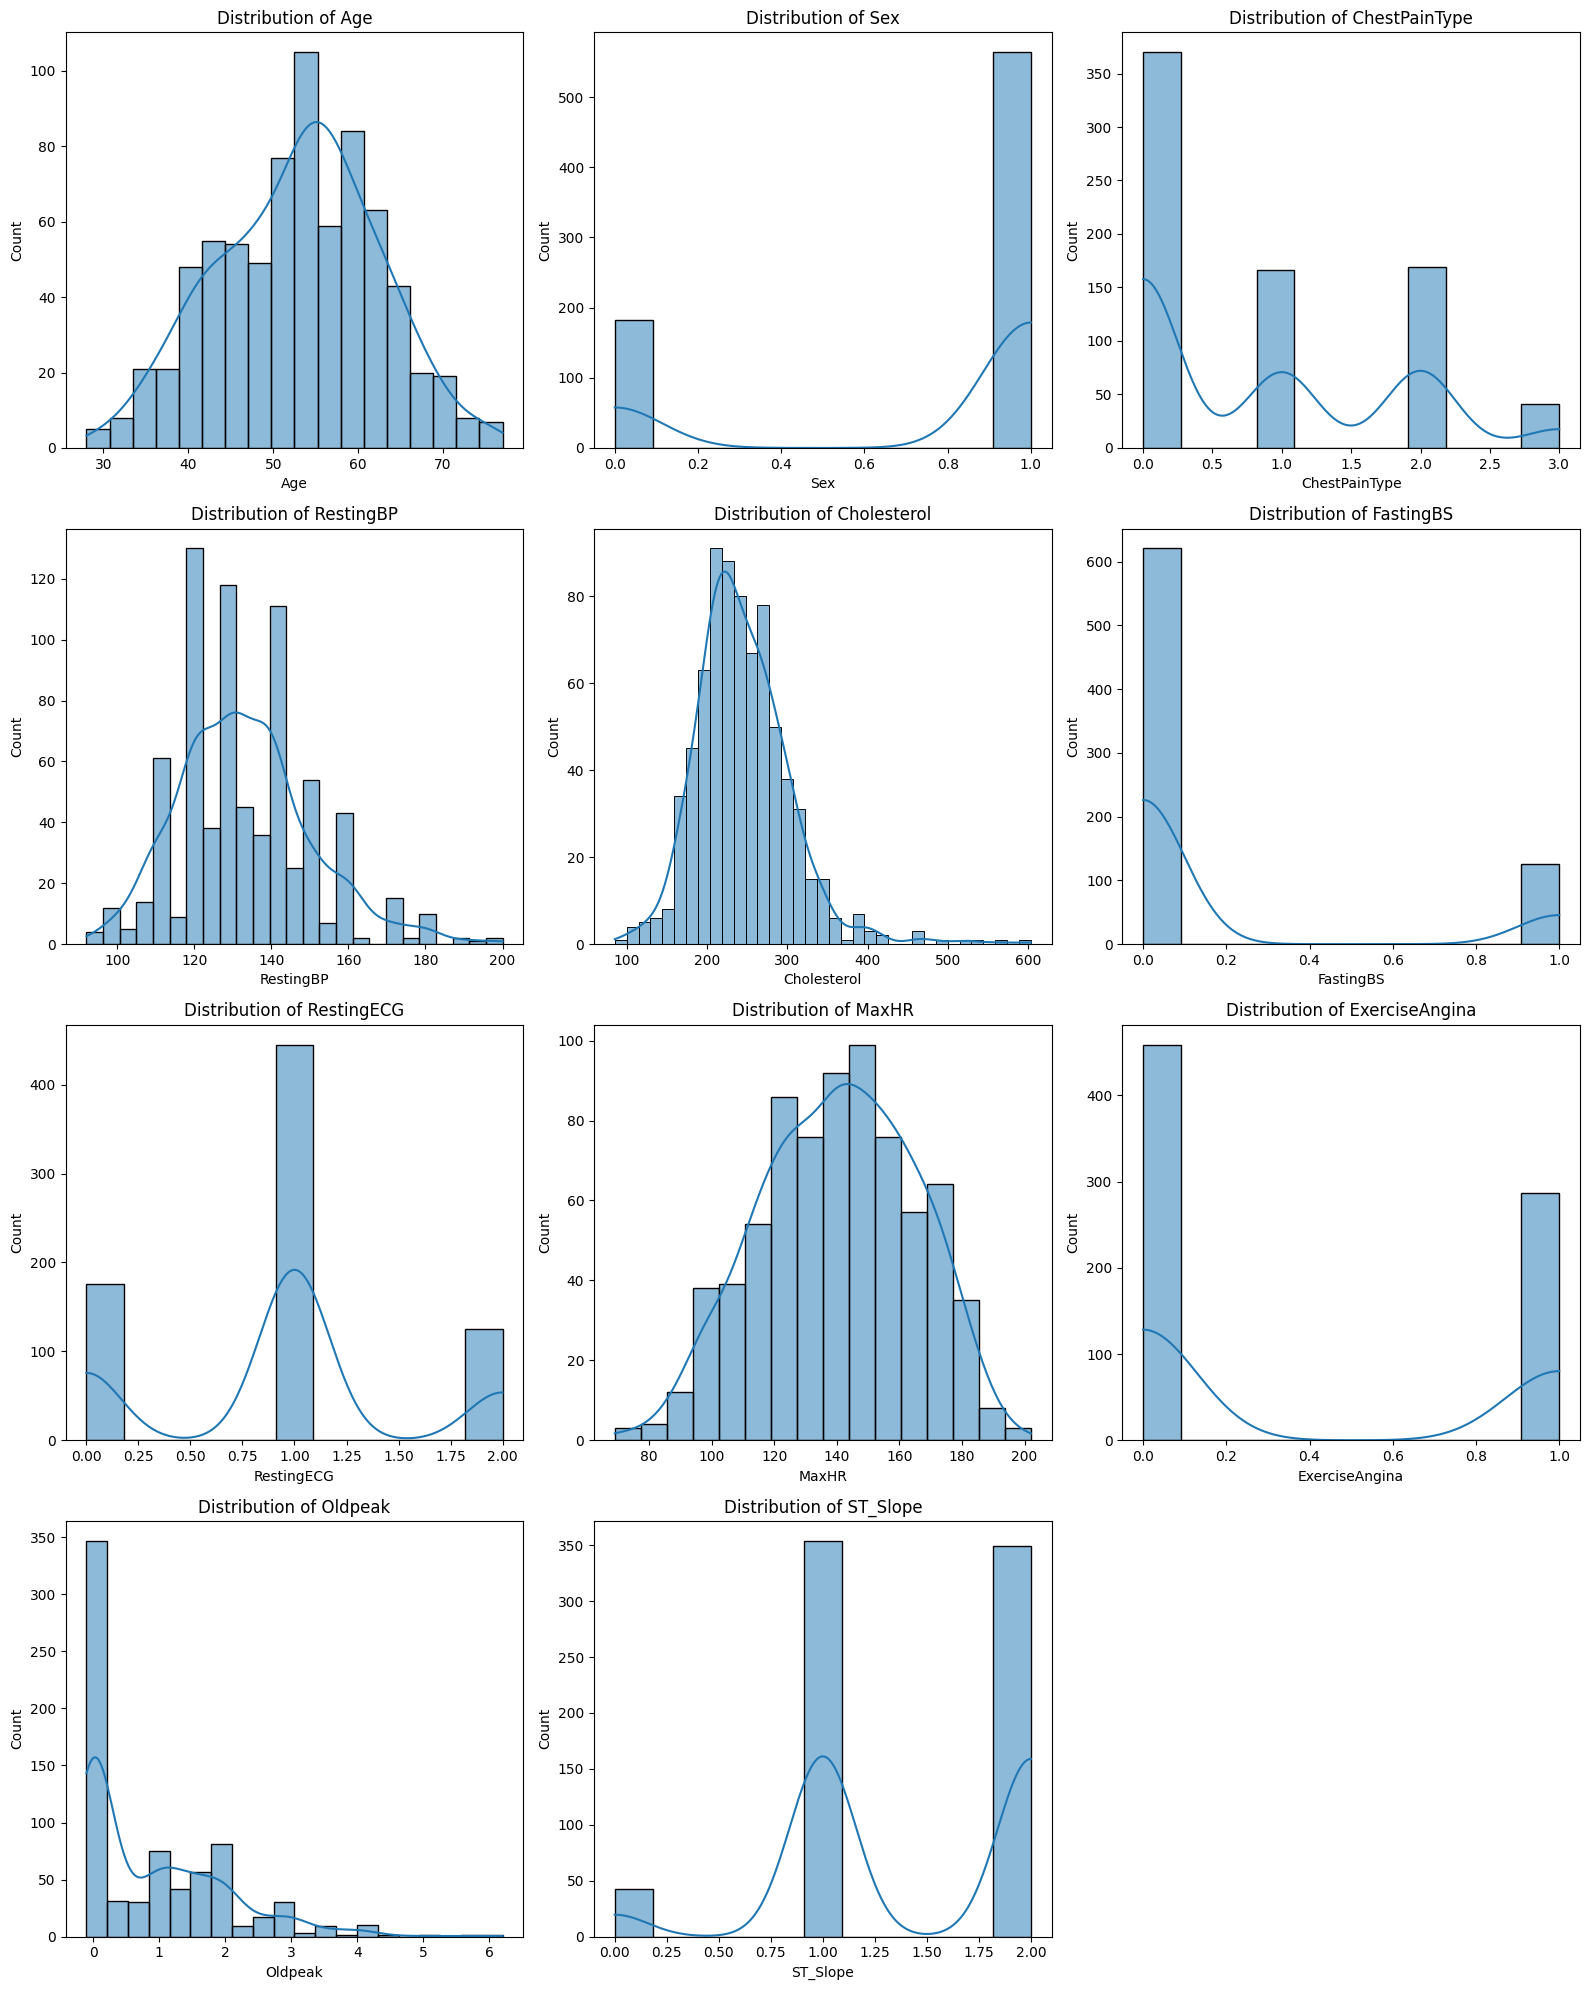

In [20]:
train_data = train_data[train_data['Cholesterol'] != 0]
# Call the function to plot the distribution
plot_categorical_distribution(train_data)

In [15]:
test_data = train_data.copy()
train_data.drop("HeartDisease",axis=1, inplace=True)

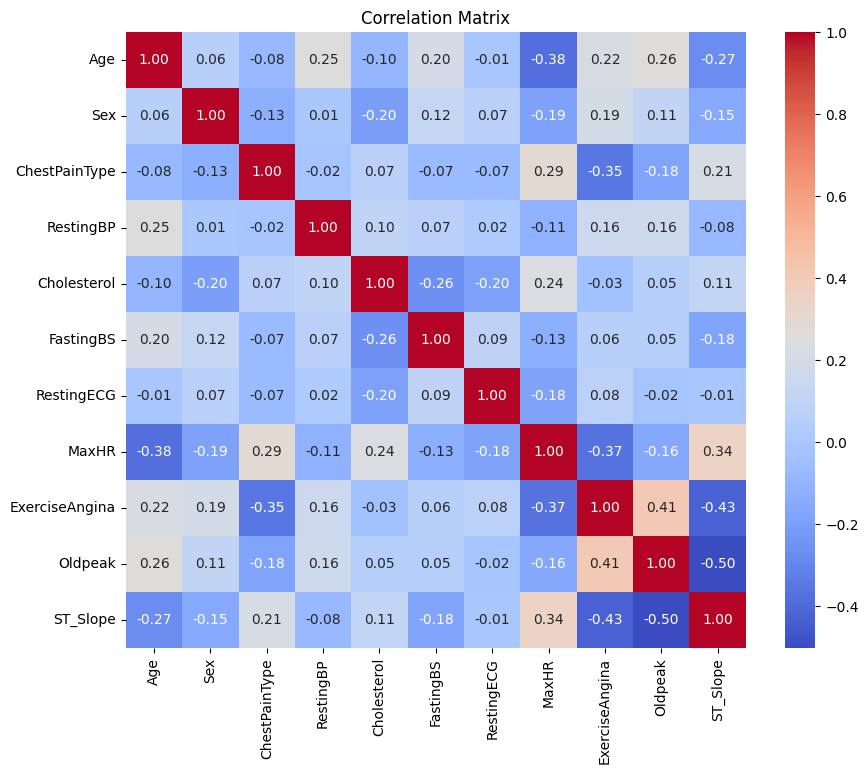

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the DataFrame
corr_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
# Generate a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


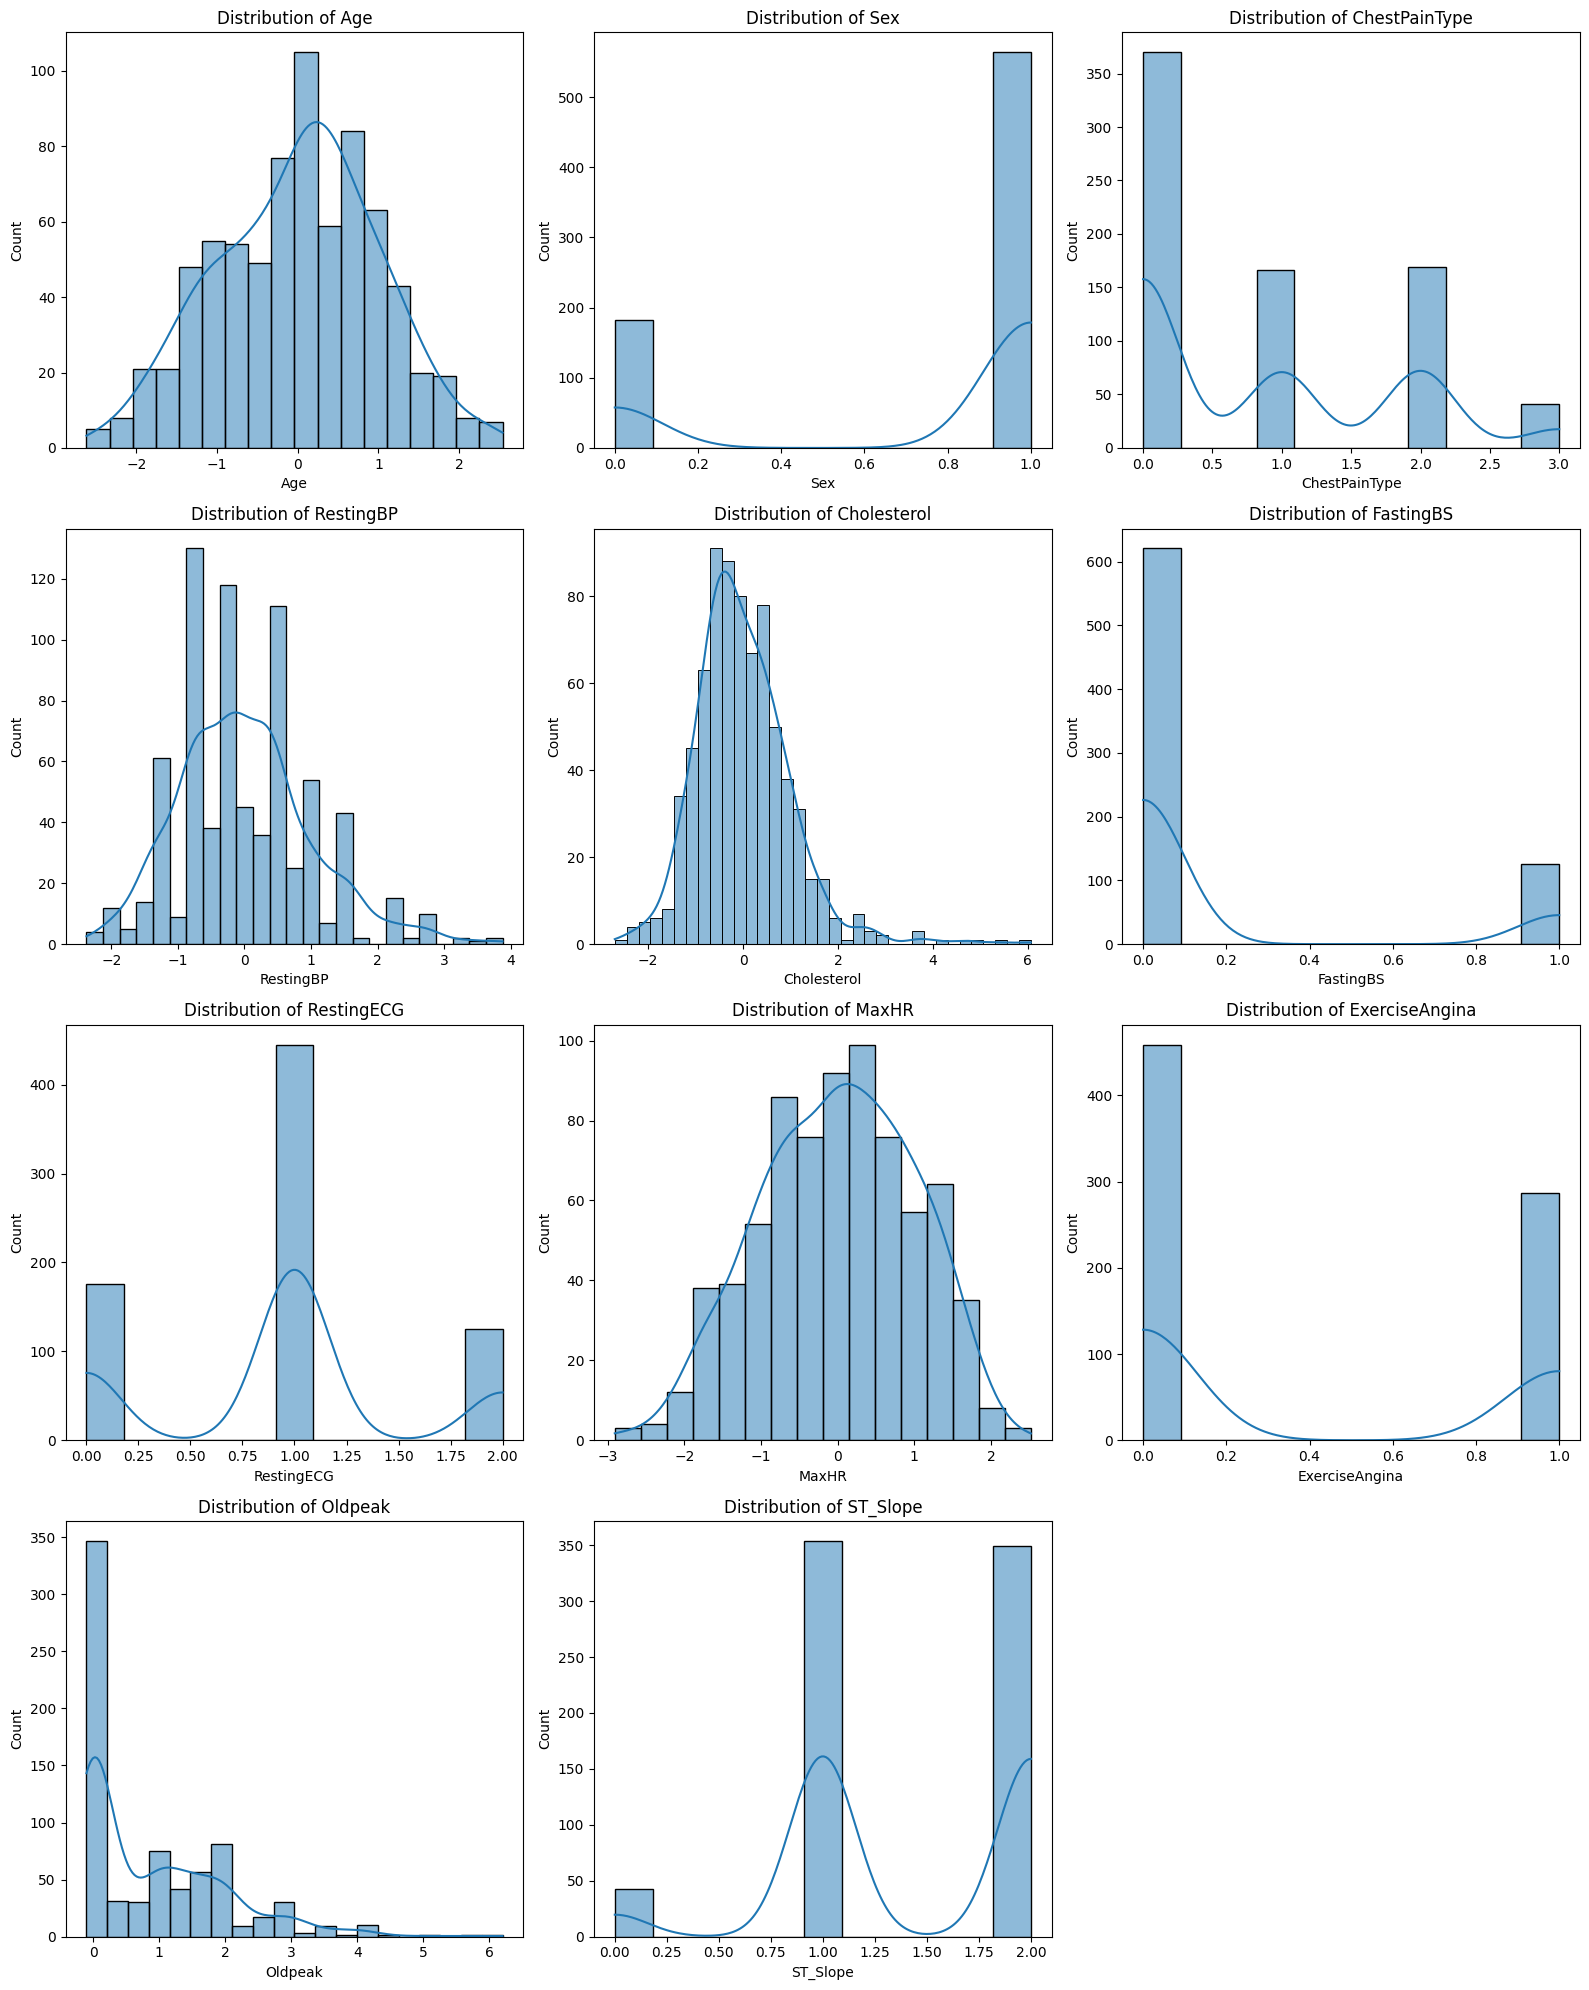

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# List of columns to be standardized
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Check if all columns in the list exist in the DataFrame
missing_columns = [col for col in columns_to_scale if col not in train_data.columns]
if missing_columns:
    print(f"Warning: The following columns are not in the DataFrame and will be skipped: {missing_columns}")
else:
    # Standardize the selected columns
    train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

    # Display the first few rows to check the results
    train_data.head()

plot_categorical_distribution(train_data)